In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

TRAINING SET 
>In training set we have missing values in Age,Cabin,Embarked with Age having the maximum number of missing values out of all. Since age has a lot of missing values we will replace it by avg age grouped by PClass instead of avg age of the whole dataset. A reason for finding mean grouped by PClass is that it is most related to Age which can be seen from the heat map below.

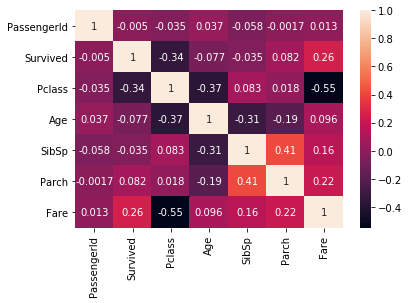

In [4]:
sns.heatmap(train_data.corr(),annot=True)
#Age is correlated to PCLASS the most with corr value of -0.37.

In [5]:
df=train_data.groupby('Pclass',as_index=False)['Age'].mean()
df.head()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [6]:
#Replacing missing vales in training set
#AGE
for i,row in train_data.iterrows():
    if(np.isnan(train_data['Age'][i])==True):
        if(train_data['Pclass'][i]==1):
            train_data['Age'][i]=38.0
        elif(train_data['Pclass'][i]==2):
            train_data['Age'][i]=30.0
        else:
            train_data['Age'][i]=25.0
#CABIN (It has maximum number of missing values and hence it will NOT be worth a feature to work on. Still we will replace
#the missing values with its mode)
train_data['Cabin']=train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
#EMBARKED
#For this we have two missing values each having equivalent Fare of $80 and same PClass,same ticketnumber this
#means that they had to board from the same station.And on google search, I got to know that Amelie Icard boarded from SouthHampton.
#This means that both of them boarded from SouthHampton.
train_data['Embarked']=train_data['Embarked'].fillna('S')

C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
train_data.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


TEST SET
>In test set we have missing values in Age,Cabin,Fare with Age having the maximum number of missing values out of all. Since age has a lot of missing values we will replace it by median age grouped by PClass instead of avg age of the whole dataset. As age is right-skewed so it will be better to replace it with median values

In [8]:
df=test_data.groupby('Pclass',as_index=False)['Age'].median()
df.head()

,Pclass,Age
0,1,42.0
1,2,26.5
2,3,24.0


In [9]:
#Replacing Missing Values in Test Set
#AGE
for i,row in test_data.iterrows():
    if(np.isnan(test_data['Age'][i])==True):
        if(test_data['Pclass'][i]==1):
            test_data['Age'][i]=41.0
        elif(test_data['Pclass'][i]==2):
            test_data['Age'][i]=28.0
        else:
            test_data['Age'][i]=24.0
#CABIN
test_data['Cabin']=test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])
#FARE
#We can see that Fare is most correlated to Pclass and hence it should be computed by median of fare grouped by pclass.
#As the person belonged to class 3, we will take mean of class 3.

C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RADHA JAYARAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df=test_data.groupby('Pclass',as_index=False)['Fare'].median()
df.head()

,Pclass,Fare
0,1,60.0000
1,2,15.7500
2,3,7.8958


In [11]:
test_data['Fare']=test_data['Fare'].fillna(7.89)
test_data.isna().sum()
#NO MISSING VALUES

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

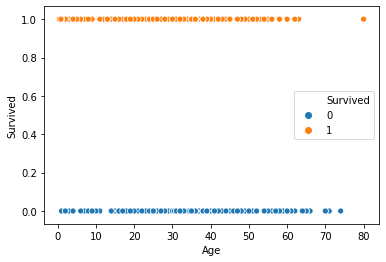

In [12]:
sns.scatterplot(data=train_data,x='Age',y='Survived',hue='Survived')

>Age doesnt seem to vary much with Survival and I think it should NOT be taken as a feature to build our model upon.

# PREPARING DATA FOR TRAINING

In [13]:
traindata=train_data.drop(['Name','Ticket','Cabin','PassengerId','Fare','SibSp','Age'],axis=1)
testdata=test_data.drop(['Name','Ticket','Cabin','PassengerId','Fare','SibSp','Age'],axis=1)
traindata.head()

,Survived,Pclass,Sex,Parch,Embarked
0,0,3,male,0,S
1,1,1,female,0,C
2,1,3,female,0,S
3,1,1,female,0,S
4,0,3,male,0,S


****Getting dummies for our categorical variables

In [14]:
X_train=traindata.iloc[:,1:]
y_train=traindata.iloc[:,0]
X_train=pd.get_dummies(X_train,['Sex','Embarked'])
X_test=testdata.iloc[:,:]
X_test=pd.get_dummies(X_test,['Sex','Embarked'])


# model

In [15]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_train_predict=classifier.predict(X_train)
y_test=classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report
print('Accuracy for training set is: ',accuracy_score(y_train,y_train_predict))
print('AUC SCORE for training set: ',roc_auc_score(y_train,y_train_predict))

Accuracy for training set is:  0.813692480359147
AUC SCORE for training set:  0.7705397373214457


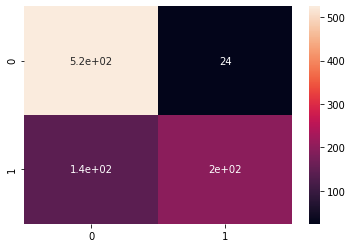

In [18]:
cm=confusion_matrix(y_train,y_train_predict)
sns.heatmap(cm,annot=True)

In [19]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       549
           1       0.89      0.58      0.71       342

    accuracy                           0.81       891
   macro avg       0.84      0.77      0.79       891
weighted avg       0.83      0.81      0.80       891



In [20]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test})
output.to_csv('svc-titanic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
